In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import constants
import astropy.units as u
import pymoog
import rulerwd
import os
import re

MOOG_path = '{}/.pymoog/moog_nosm/moog_nosm_NOV2019/'.format(os.environ['HOME'])
MOOG_run_path = '{}/.pymoog/rundir/'.format(os.environ['HOME'])
internal_path = '/media/disk/my_writing/mingjie-workspace/source/he_abun/img/pymoog/'

Module "telfit" is not installed, module "telfit_wrapper" cannot be used. Don't try it :-)


# Effciency determination

In [134]:
%%timeit

s = pymoog.synth.synth(5000, 2.0, 0, 10800, 10810 + 20*4, 28000, line_list='vald_3000_11000')
s.prepare_file()
s.run_moog()
s.read_spectra()

4.51 s ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


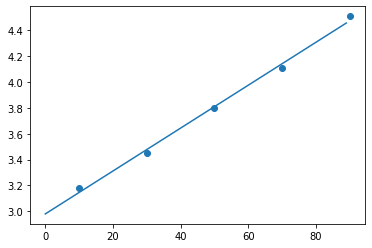

In [137]:
wav_length = np.arange(10, 100, 20)
time = [3.18, 3.45, 3.80, 4.11, 4.51]

plt.scatter(wav_length, time)
res = np.polyfit(wav_length, time, 1)
x = np.arange(0, 90, 1)
y = np.polyval(res, x)
plt.plot(x, y)

# Renewing VALD line list

In [1]:
import smtplib
import internal

In [4]:
pymoog.internal.vald2moog('files/linelist/vald/MingjieJian.4202561', 'temp.list')

KeyError: 'moog_support'

In [ ]:
import smtplib
from email.mime.text import MIMEText

In [23]:
msg = MIMEText('hello, send by Python...', 'plain', 'utf-8')

In [24]:
# Email地址和口令:
from_addr = 'bnumkk@outlook.com'
from_addr = 'jian-mingjie@g.ecc.u-tokyo.ac.jp'
password = 'zhUjiaNriyUe1,'
# 收件人地址:
to_addr = 'ssaajianmingjie@gmail.com'
# SMTP服务器地址:
smtp_server = 'smtp.gmail.com'
smtp_port = 587
server = smtplib.SMTP(smtp_server, smtp_port)
server.starttls()

server.set_debuglevel(1)
server.login(from_addr, password)
server.sendmail(from_addr, [to_addr], msg.as_string())
server.quit()

send: 'ehlo [127.0.1.1]\r\n'
reply: b'250-TY2PR02CA0014.outlook.office365.com Hello [2001:200:180:1104:e453:55b2:fa7f:5f75]\r\n'
reply: b'250-SIZE 157286400\r\n'
reply: b'250-PIPELINING\r\n'
reply: b'250-DSN\r\n'
reply: b'250-ENHANCEDSTATUSCODES\r\n'
reply: b'250-AUTH LOGIN XOAUTH2\r\n'
reply: b'250-8BITMIME\r\n'
reply: b'250-BINARYMIME\r\n'
reply: b'250-CHUNKING\r\n'
reply: b'250 SMTPUTF8\r\n'
reply: retcode (250); Msg: b'TY2PR02CA0014.outlook.office365.com Hello [2001:200:180:1104:e453:55b2:fa7f:5f75]\nSIZE 157286400\nPIPELINING\nDSN\nENHANCEDSTATUSCODES\nAUTH LOGIN XOAUTH2\n8BITMIME\nBINARYMIME\nCHUNKING\nSMTPUTF8'
send: 'AUTH LOGIN Ym51bWtrQG91dGxvb2suY29t\r\n'
reply: b'334 UGFzc3dvcmQ6\r\n'
reply: retcode (334); Msg: b'UGFzc3dvcmQ6'
send: 'emhVamlhTnJpeVVlMjA1MA==\r\n'
reply: b'235 2.7.0 Authentication successful\r\n'
reply: retcode (235); Msg: b'2.7.0 Authentication successful'
send: 'mail FROM:<bnumkk@outlook.com> size=133\r\n'
reply: b'250 2.1.0 Sender OK\r\n'
reply: retcode (2

(221, b'2.0.0 Service closing transmission channel')

# MARCS model

In [2]:
file = ! ls files/model/marcs/

In [3]:
path = 'files/model/marcs/' + file[0]
! extract path

'MARCS_MKK_20210509073507.tar'

In [4]:
pymoog.model.read_Kurucz_model('files/model/marcs/p2500_g+3.5_m0.0_t02_st_z-2.50_a+0.40_c+0.00_n+0.00_o+0.40_r+0.00_s+0.00.krz')

ValueError: invalid literal for int() with base 10: '-10.54'